In [1]:
# library & dataset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
pd.set_option('display.max_rows', 426)
indian_food = pd.read_csv("indian_food.csv")

## Comentarios
Column num_ingr  
Basic correlogram: prep_time, cook_time, num_ingr  
Correlogram with regression: prep_time, cook_time, num_ingr  
Pair plot: prep_time, cook_time, num_ingr  
Scatterplot: prep_time and cook_time (with/without outliers)  
Scatterplot: prep_time, cook_time and course  
Jointplot with histogram: prep_time and cook_time  
Lineplot: cook_time, num_ingr, course  
Lineplot: cook_time and num_ingr  
Lineplot: prep_time and num_ingr  
Lineplot: cook_time and prep_time  
Lineplot: cook_time and prep_time and diet  

In [2]:
indian_food['num_ingr'] = indian_food['ingredients'].apply(lambda x: len(x.split(',')))
indian_food.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,num_ingr
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East,4
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West,3


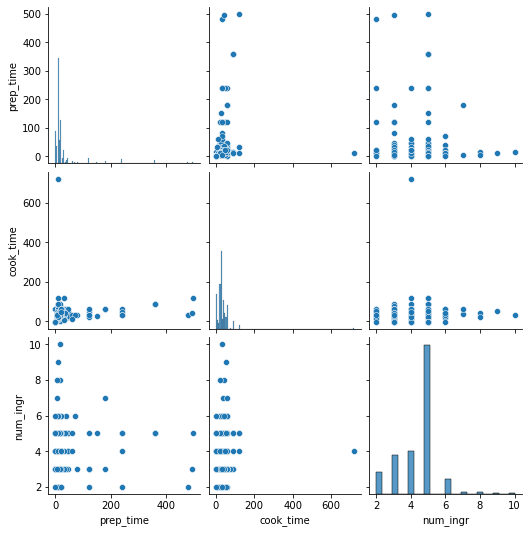

In [3]:
# Basic correlogram
sns.pairplot(indian_food)
plt.show()

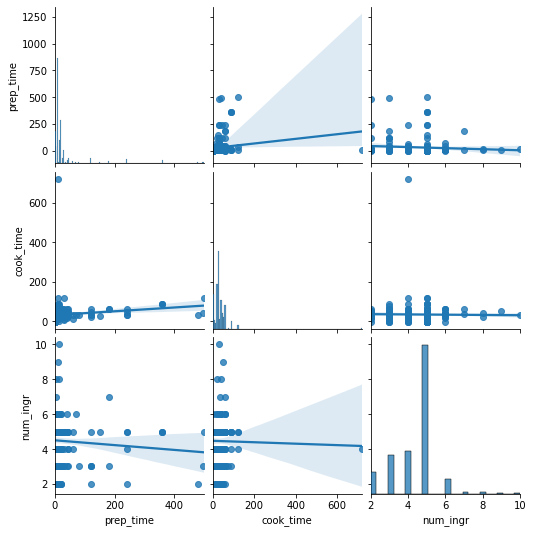

In [4]:
# with regression
sns.pairplot(indian_food, kind="reg")
plt.show()

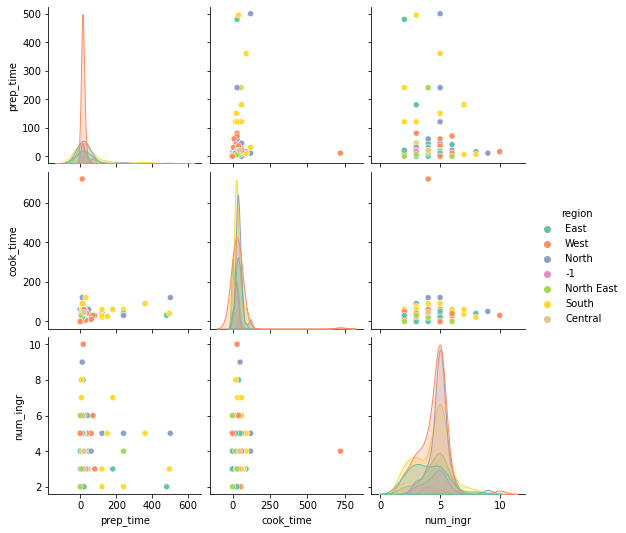

In [5]:
# left
sns.pairplot(indian_food, kind="scatter", hue="region", palette="Set2")
plt.show()

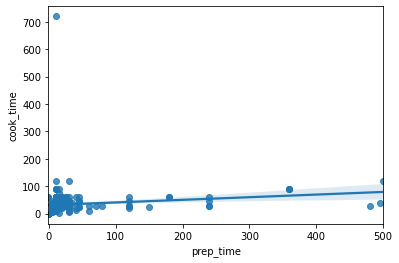

In [6]:
# use the function regplot to make a scatterplot
sns.regplot(x=indian_food["prep_time"], y=indian_food["cook_time"])
plt.show()

In [7]:
filt = (indian_food['cook_time'] == -1) | (indian_food['prep_time'] == -1)
indian_food.loc[filt].head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,num_ingr
19,Sohan papdi,"Gram flour, ghee, sugar, milk, cardamom",vegetarian,-1,60,sweet,dessert,Maharashtra,West,5
21,Chhena kheeri,"Chhena, sugar, milk",vegetarian,-1,60,sweet,dessert,Odisha,East,3
65,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,-1,-1,spicy,main course,Tripura,North East,4
132,Kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South,5
134,Keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, ...",vegetarian,-1,-1,spicy,main course,Tamil Nadu,South,5


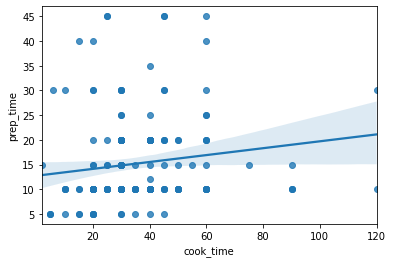

In [8]:
no_720 = (indian_food['cook_time'] == 720) | (indian_food['cook_time'] == -1) | \
          (indian_food['prep_time'] >= 50) | (indian_food['prep_time'] == -1)
food = indian_food.loc[~no_720]
# use the function regplot to make a scatterplot
sns.regplot(x=food["cook_time"], y=food["prep_time"])
plt.show()

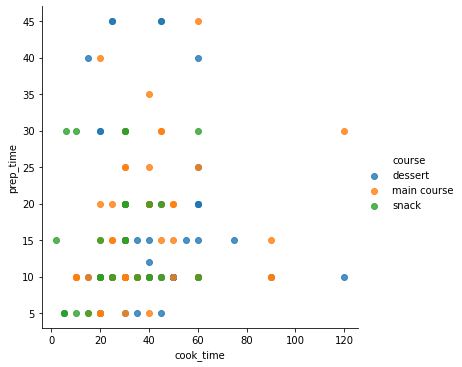

In [9]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="cook_time", y="prep_time", data=food, fit_reg=False, hue='course', legend=True)
plt.show()

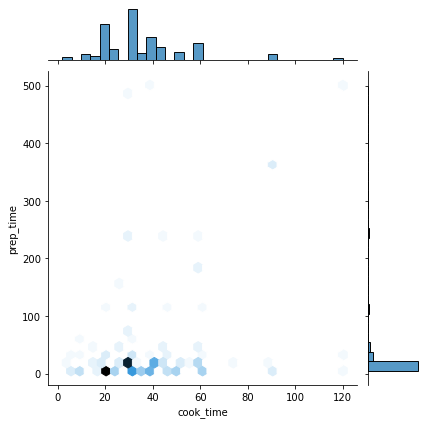

In [10]:
no_720 = (indian_food['cook_time'] == 720) | (indian_food['cook_time'] == -1) | \
         (indian_food['prep_time'] == -1) # | (indian_food['prep_time'] >= 300)
food = indian_food.loc[~no_720]
# Custom the histogram:
sns.jointplot(x=food["cook_time"], y=food["prep_time"], kind='hex', marginal_kws=dict(bins=30, fill=True))

plt.show()

<AxesSubplot:xlabel='cook_time', ylabel='num_ingr'>

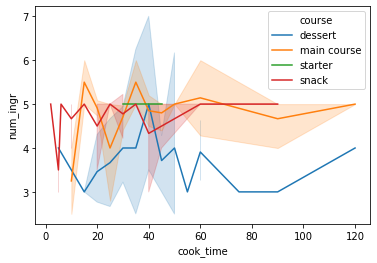

In [27]:
sns.lineplot(x="cook_time", y="num_ingr", hue='course', data=food)

<AxesSubplot:xlabel='cook_time', ylabel='num_ingr'>

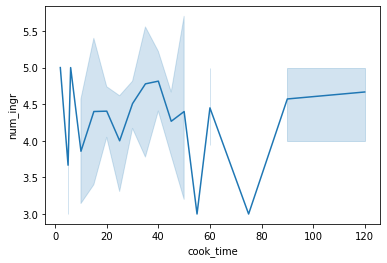

In [22]:
sns.lineplot(x="cook_time", y="num_ingr", data=food)

<AxesSubplot:xlabel='prep_time', ylabel='num_ingr'>

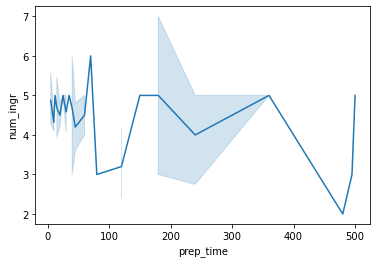

In [23]:
sns.lineplot(x="prep_time", y="num_ingr", data=food)

<AxesSubplot:xlabel='cook_time', ylabel='prep_time'>

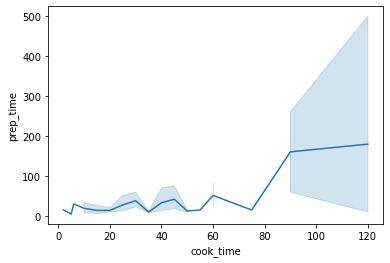

In [24]:
sns.lineplot(x="cook_time", y="prep_time", data=food)

<AxesSubplot:xlabel='cook_time', ylabel='prep_time'>

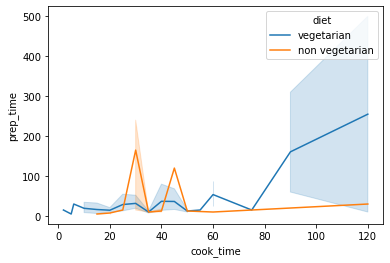

In [25]:
sns.lineplot(x="cook_time", y="prep_time", hue='diet', data=food)